# Loading Data

Baixe sua base de dados de http://ninfa.inf.ufes.br/RPDBCS3/data/

In [1]:
from rpdbcs.datahandler.dataset import readDataset

D = readDataset('/home/lhsmello/ufes/NINFA/lmello_RPDBCS3/data/data_classified_v6/freq.csv',
                '/home/lhsmello/ufes/NINFA/lmello_RPDBCS3/data/data_classified_v6/labels.csv',
                remove_first=100, nsigs=300, npoints=10800)
# D.normalize(37.28941975);
# D.normalize("min")
display(D.asDataFrame())

,Signal id,Signal name,xhz_0,xhz_step,xhz_end,rotation_hz,real_rotation_hz,sample_rate,peak1x,peak2x,...,"avg2(3,f)","std(3,f)","outliers3(3,f)","rms(freq-1,freq+1)","median(freq-1,freq+1)","median(3,5)",Roçamento,Problemas na medição,Desalinhamento,Desbalanceamento
0,19751,Bomba 1 X 0.0 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.20620,0.01160,...,0.003000,7.108137e-06,0.226246,0.028731,0.00206,0.00042,0,0,0,1
1,19785,Motor 1 Y 0.5 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.03282,0.00738,...,0.001788,2.276130e-06,0.267159,0.004575,0.00057,0.00183,0,0,0,0
2,19783,Motor 1 X 0.5 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.01097,0.00582,...,0.001716,1.884083e-06,0.291303,0.001649,0.00059,0.00042,0,0,0,0
3,19801,Motor 2 Y 0.5 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.01644,0.00429,...,0.001724,1.888824e-06,0.307400,0.002317,0.00039,0.00037,0,0,0,0
4,19749,Bomba 1 Y 1.0 at 60.0Hz MAX__Centrilift/Carape...,1.254156,0.012417,248.360201,60.0,58.547990,4096.0,0.10768,0.02590,...,0.003213,3.884784e-06,0.323273,0.015029,0.00123,0.00165,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,20635,Motor 2 Y 1.0 at 50.0Hz MAX__Centrilift/Espada...,1.254156,0.012417,248.360201,50.0,48.874844,4096.0,0.05899,0.00682,...,0.001196,1.375845e-06,0.303194,0.008172,0.00108,0.00037,0,0,0,0
296,20639,Motor 2 X 0.0 at 50.0Hz MAX__Centrilift/Espada...,1.254156,0.012417,248.360201,50.0,48.862426,4096.0,0.01018,0.00903,...,0.001301,1.325538e-06,0.317086,0.001743,0.00054,0.00078,0,0,0,0
297,20643,Motor 2 X 0.5 at 50.0Hz MAX__Centrilift/Espada...,1.254156,0.012417,248.360201,50.0,48.874844,4096.0,0.03077,0.01106,...,0.000962,5.790848e-07,0.300217,0.004466,0.00116,0.00039,0,0,0,0
298,20591,Bomba 1 Y 0.5 at 50.0Hz MAX__Centrilift/Espada...,1.254156,0.012417,248.360201,50.0,49.110774,4096.0,0.01459,0.00124,...,0.003868,4.601318e-06,0.300566,0.002034,0.00041,0.00800,0,0,0,0


# Loading TripletNet

In [2]:
from tripletnet.networks import TripletNetwork, lmelloEmbeddingNet


triplet_net = TripletNetwork.load('5feats_tripletspace.pt',
                                  net_arch=lmelloEmbeddingNet(5).cuda(),
                                  map_location='cuda:0') # carregar a rede direto pra gpu
triplet_net.eval();# evaluation mode. Do not activate if you want to train
triplet_net.net_arch

lmelloEmbeddingNet(
  (convnet): Sequential(
    (0): Conv1d(1, 16, kernel_size=(5,), stride=(1,))
    (1): LeakyReLU(negative_slope=0.05)
    (2): Dropout(p=0.2, inplace=False)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(16, 32, kernel_size=(5,), stride=(1,))
    (5): LeakyReLU(negative_slope=0.05)
    (6): Dropout(p=0.2, inplace=False)
    (7): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (8): Conv1d(32, 64, kernel_size=(5,), stride=(1,))
    (9): LeakyReLU(negative_slope=0.05)
    (10): Dropout(p=0.2, inplace=False)
    (11): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=6016, out_features=192, bias=True)
    (1): LeakyReLU(negative_slope=0.05)
    (2): Linear(in_features=192, out_features=5, bias=True)
  )
)

# Running TripletNet
Para gerar os enccoding de uma matriz de features (1 exemplo por linha), basta usar o método `TripletNetwork.embed`:

In [3]:
X = D.asMatrix()[:,:6100]
display(triplet_net.embed(X).cpu().numpy())

array([[-0.1772067 , -0.11895558, -0.16052845,  0.07068034,  0.62511814],
       [-0.22011246, -0.262599  , -0.3150453 ,  0.18655029,  0.578752  ],
       [-0.14076202, -0.17683965, -0.35274556,  0.0808334 ,  0.62659496],
       ...,
       [-0.2875792 , -0.34867334, -0.35233915,  0.25202677,  0.59960794],
       [-0.3289195 , -0.3085217 , -0.09688676,  0.23990265,  0.6194839 ],
       [-0.27418864, -0.34834868, -0.37370527,  0.25609243,  0.62700117]],
      dtype=float32)

Vejamos como fica a codificação do terceiro sinal de vibração:

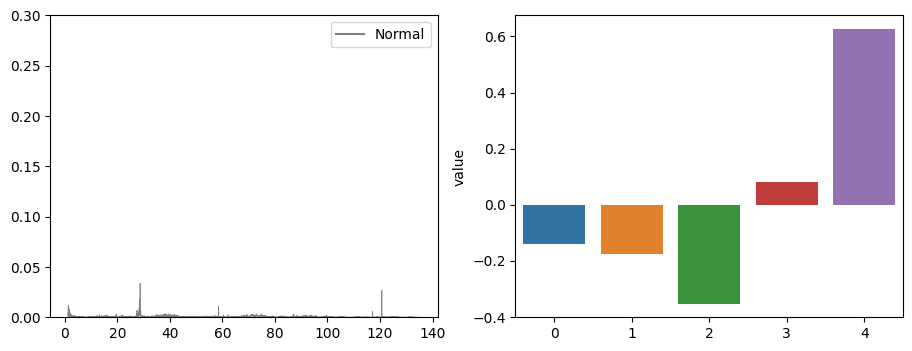

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from rpdbcs.datahandler.dataview import plotSpectrum


###Para ajustar o tamanho das figuras:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [11, 4]
#########

signal = D.getSignal(2)
plt.subplot(1,2,1)
plotSpectrum(signal)

encodding = triplet_net.embed([signal.freq.getY()[:6100]]).cpu().numpy()

df = pd.DataFrame({'value': encodding[0]}) # apenas para fazer o barplot bonito.
plt.subplot(1,2,2)
sns.barplot(data=df, x=df.index, y='value');


# Combine with classifiers
Para fazer do triplet network um classificador, basta usa a classe **AugmentedClassifier**:

In [5]:
from tripletnet.classifiers.augmented_classifier import AugmentedClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(1)

targets, targets_name = D.getMulticlassTargets()

classificador = AugmentedClassifier(knn, triplet_net)
classificador.train_tripletnet = False # remova essa linha caso queira treinar a tripletnet junto com o classificador.
# classificador.set_train_params(learning_rate=0.001, num_subepochs=8, batch_size=32, num_epochs=16)
# classificador.set_custom_training(your_custom_training_procedure)
# classificador.set_custom_loss(your_custom_loss) # see siamese_triplet.losses.OnlineTripletLoss
classificador.fit(X[:100], targets[:100]) # apenas os 100 primeiros exemplos
classificador.predict(X[100:110]) # apenas 10 exemplos de teste.

array([4, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Training
Para treinar do zero, carregue uma nova rede neural zerada:

In [8]:
from siamese_triplet.losses import OnlineTripletLoss
import siamese_triplet

triplet_net = TripletNetwork(net_arch=lmelloEmbeddingNet(5).cuda()) # carregar a rede direto pra gpu
dataset = (X,targets)
triplet_net.train(dataset, learning_rate=0.01, num_subepochs=8, batch_size=25, num_epochs=16,
                  custom_loss=OnlineTripletLoss, 
                  custom_trainepoch=siamese_triplet.trainer.train_epoch,
                  )

====train_tripletNetworkAdvanced: iteration 1====
Train: [0/300 (0%)]	Loss: 0.999997	Average nonzero triplets: 600.0
Epoch: 1/8. Train set: Average loss: 1.0000	Average nonzero triplets: 600.0
Train: [0/300 (0%)]	Loss: 0.999992	Average nonzero triplets: 600.0
Epoch: 2/8. Train set: Average loss: 1.0000	Average nonzero triplets: 600.0
Train: [0/300 (0%)]	Loss: 0.999992	Average nonzero triplets: 600.0
Epoch: 3/8. Train set: Average loss: 1.0000	Average nonzero triplets: 600.0
Train: [0/300 (0%)]	Loss: 0.999959	Average nonzero triplets: 600.0
Epoch: 4/8. Train set: Average loss: 0.9995	Average nonzero triplets: 600.0
Train: [0/300 (0%)]	Loss: 0.990875	Average nonzero triplets: 600.0
Epoch: 5/8. Train set: Average loss: 0.9759	Average nonzero triplets: 600.0
Train: [0/300 (0%)]	Loss: 0.683969	Average nonzero triplets: 596.0
Epoch: 6/8. Train set: Average loss: 0.7750	Average nonzero triplets: 595.0
Train: [0/300 (0%)]	Loss: 1.449239	Average nonzero triplets: 582.0
Epoch: 7/8. Train set: Av

Train: [0/300 (0%)]	Loss: 0.172470	Average nonzero triplets: 342.0
Epoch: 8/8. Train set: Average loss: 0.1957	Average nonzero triplets: 418.0
====train_tripletNetworkAdvanced: iteration 8====
Train: [0/300 (0%)]	Loss: 0.182155	Average nonzero triplets: 492.0
Epoch: 1/8. Train set: Average loss: 0.1427	Average nonzero triplets: 455.0
Train: [0/300 (0%)]	Loss: 0.163938	Average nonzero triplets: 575.0
Epoch: 2/8. Train set: Average loss: 0.1526	Average nonzero triplets: 533.5
Train: [0/300 (0%)]	Loss: 0.156239	Average nonzero triplets: 500.0
Epoch: 3/8. Train set: Average loss: 0.1285	Average nonzero triplets: 475.5
Train: [0/300 (0%)]	Loss: 0.156398	Average nonzero triplets: 461.0
Epoch: 4/8. Train set: Average loss: 0.1648	Average nonzero triplets: 440.0
Train: [0/300 (0%)]	Loss: 0.154162	Average nonzero triplets: 489.0
Epoch: 5/8. Train set: Average loss: 0.1645	Average nonzero triplets: 489.0
Train: [0/300 (0%)]	Loss: 0.135154	Average nonzero triplets: 437.0
Epoch: 6/8. Train set: Av

Train: [0/300 (0%)]	Loss: 0.028133	Average nonzero triplets: 371.0
Epoch: 7/8. Train set: Average loss: 0.0254	Average nonzero triplets: 404.5
Train: [0/300 (0%)]	Loss: 0.025060	Average nonzero triplets: 372.0
Epoch: 8/8. Train set: Average loss: 0.0242	Average nonzero triplets: 389.0
====train_tripletNetworkAdvanced: iteration 15====
Train: [0/300 (0%)]	Loss: 0.017674	Average nonzero triplets: 432.0
Epoch: 1/8. Train set: Average loss: 0.0206	Average nonzero triplets: 412.0
Train: [0/300 (0%)]	Loss: 0.023049	Average nonzero triplets: 338.0
Epoch: 2/8. Train set: Average loss: 0.0227	Average nonzero triplets: 387.0
Train: [0/300 (0%)]	Loss: 0.016456	Average nonzero triplets: 507.0
Epoch: 3/8. Train set: Average loss: 0.0143	Average nonzero triplets: 495.0
Train: [0/300 (0%)]	Loss: 0.012575	Average nonzero triplets: 404.0
Epoch: 4/8. Train set: Average loss: 0.0125	Average nonzero triplets: 405.0
Train: [0/300 (0%)]	Loss: 0.015750	Average nonzero triplets: 451.0
Epoch: 5/8. Train set: A